# Question 4: Model (Con'd)

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

Provide an estimate of performance using an appropriate sample, and show your work.

Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

# Evaluation


In [13]:
import pickle
import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
pp = pprint.PrettyPrinter(indent=4)

In [14]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [20]:
# Grid objects from the grid search
with open('results/result_dict', 'rb') as file:
    results = pickle.load(file)
# Contains test data
with open('results/preprocessed_data', 'rb') as file:
    data = pickle.load(file)

y_true = data['y_test'].tolist()

In [21]:
# Metrics being used
from sklearn.metrics import accuracy_score, \
    confusion_matrix, \
    roc_curve

In [22]:
# Plot generating functions to not rewrite code

def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.show()

def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

## Decision Tree

Decision Tree achieves `66.4%` of accuracy in testing set.

CV score: 0.676868062457451
max_depth: 5
max_leaf_nodes: None
min_samples_leaf: 1

Accuracy: 0.6546772245336197


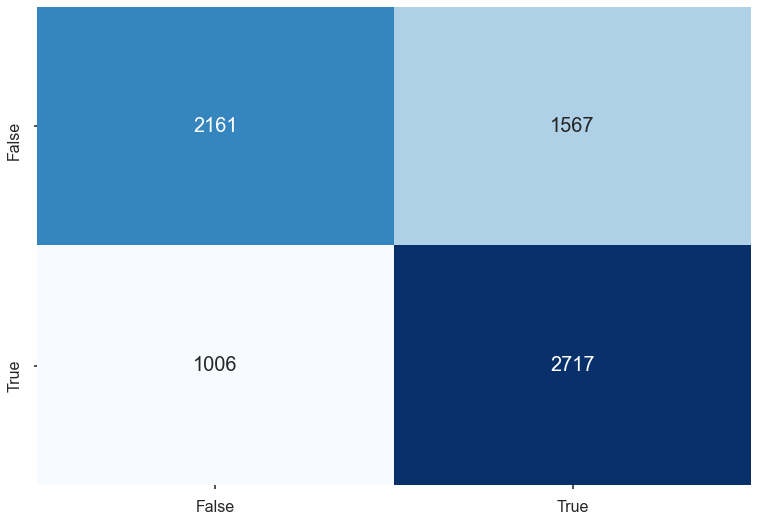

In [23]:
dec_tree = results['dec_tree'].best_estimator_
print(f'CV score: {results["dec_tree"].best_score_}')
for key, value in results["dec_tree"].best_params_.items():
    print(f'{key}: {value}')

y_pred = dec_tree.predict(data['x_test'])
y_pred_prob = dec_tree.predict_proba(data['x_test'])[:,1]
dec = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

# Logistic Regression

Logistic regression achieves `64.8%` of accuracy in testing set.

CV score: 0.6521315810986085
C: 0.05
fit_intercept: False
n_jobs: -1
penalty: l2

Accuracy: 0.5691853442490941


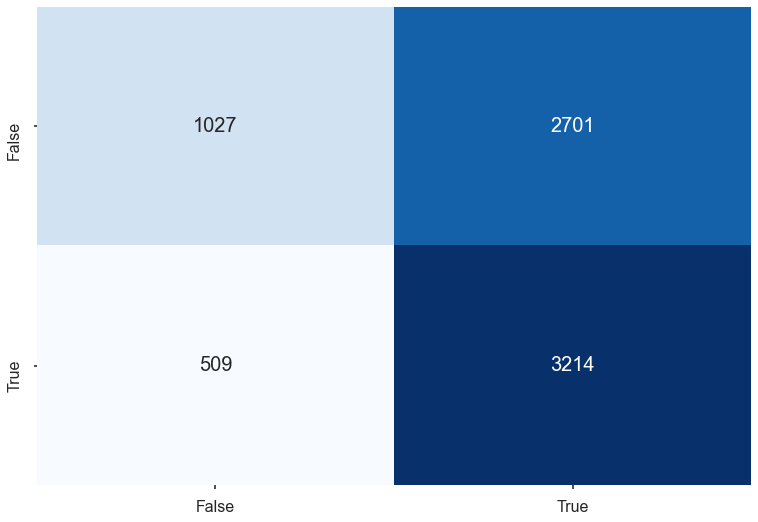

In [24]:
log_reg = results['log_reg'].best_estimator_
print(f'CV score: {results["log_reg"].best_score_}')
for key, value in results["log_reg"].best_params_.items():
    print(f'{key}: {value}')

y_pred = log_reg.predict(data['x_test'])
y_pred_prob = log_reg.predict_proba(data['x_test'])[:,1]
log = [y_true, y_pred_prob]
plot_confusion(y_pred, y_true)

## Random Forest

Random forest achieves `65.8%` of accuracy on testing set.

CV score: 0.6733019517043283
bootstrap: True
max_depth: 5
max_features: auto
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 100
oob_score: True

Accuracy: 0.6583008992081599


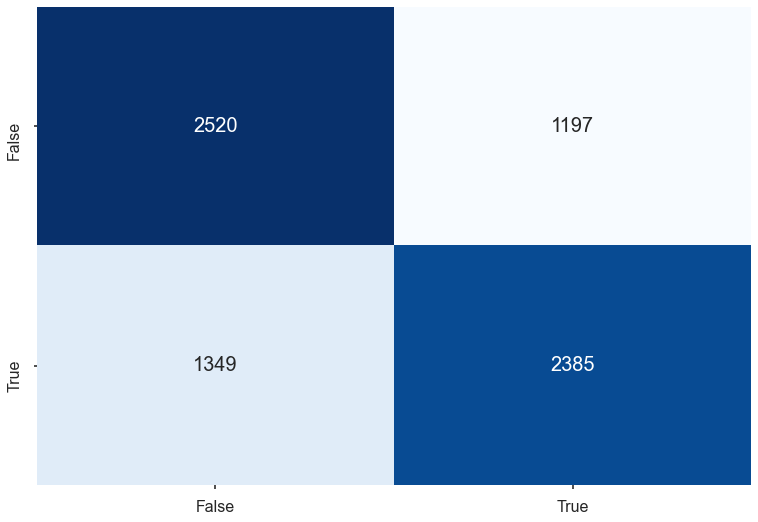

In [11]:
rf = results['rf'].best_estimator_
print(f'CV score: {results["rf"].best_score_}')
for key, value in results["rf"].best_params_.items():
    print(f'{key}: {value}')

y_pred = rf.predict(data['x_test'])
y_pred_prob = rf.predict_proba(data['x_test'])[:,1]
rand_f = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

## SVM

SVM classifier achieves `66.8%` of accuracy, which is much better compared to the benchmark of referenced model. This is because in the step of data normalization, all sample values are normalized to the range of [0,1]. 

Best CV score: 0.6732439178649902
C: 50
degree: 1
gamma: scale
kernel: rbf

Accuracy: 0.6557509059186686


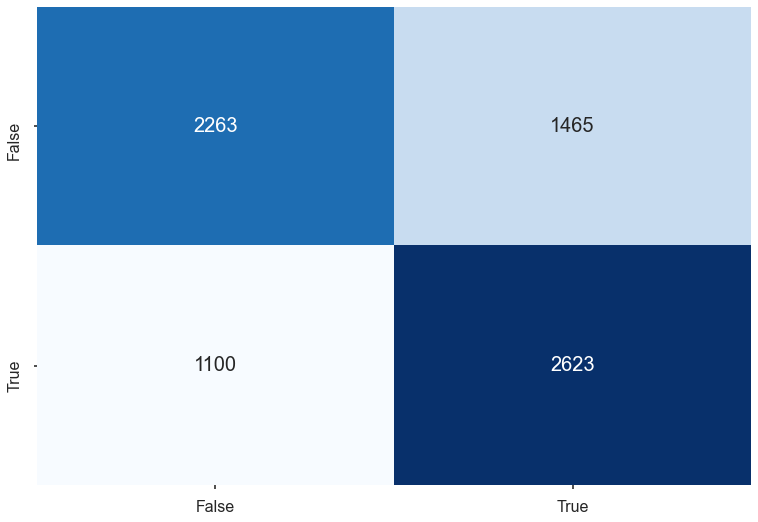

In [25]:
svm = results['svc'].best_estimator_
print(f'Best CV score: {results["svc"].best_score_}')
for key, value in results["svc"].best_params_.items():
    print(f'{key}: {value}')

y_pred = svm.predict(data['x_test'])
y_pred_prob = svm.predict_proba(data['x_test'])[:,1]
svc = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

# XGBoost

Xgboost achieves the highest accuracy of `70.5%`, which is the best over all models built. 

Best CV score: 0.7039639743400079
learning_rate: 0.05
max_depth: 5
n_estimators: 500
n_jobs: -1
reg_alpha: 0.07
reg_lambda: 0.09

Accuracy: 0.6476982955308013


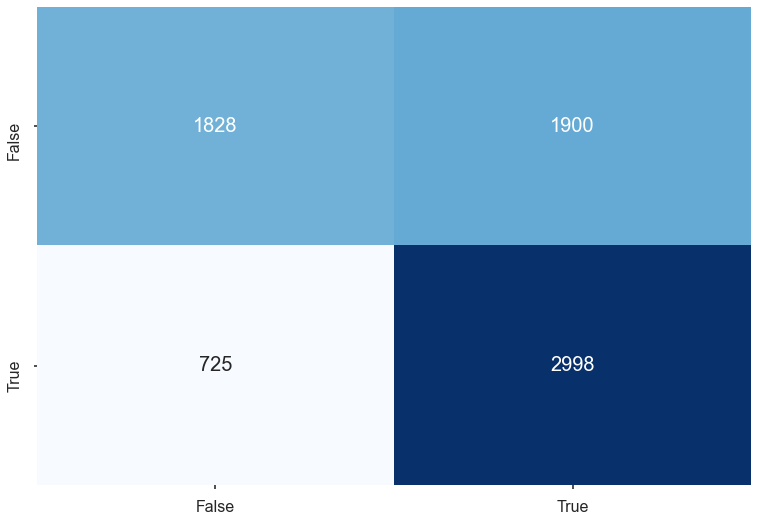

In [26]:
xgboost = results['xgboost'].best_estimator_
print(f'Best CV score: {results["xgboost"].best_score_}')
for key, value in results["xgboost"].best_params_.items():
    print(f'{key}: {value}')

y_pred = xgboost.predict(data['x_test'])
y_pred_prob = xgboost.predict_proba(data['x_test'])[:,1]
xgb = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

# ROC

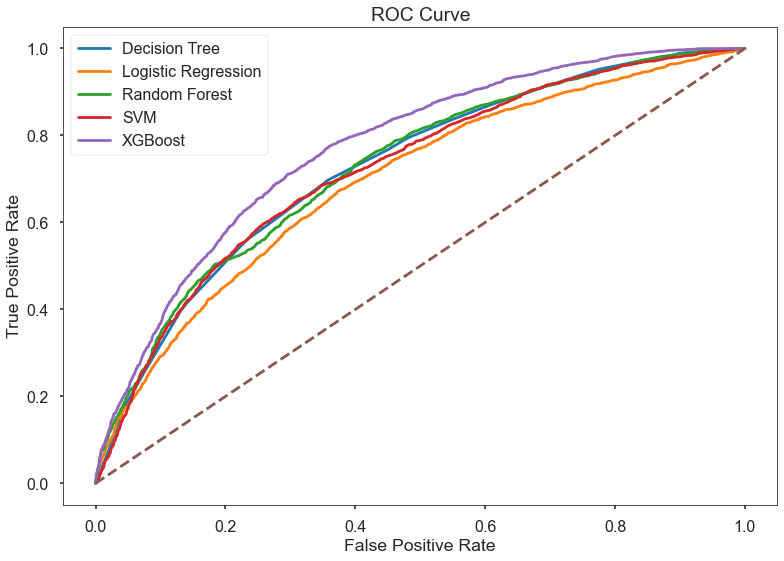

In [15]:
model_results = {
    'Decision Tree': dec,
    'Logistic Regression': log,
    'Random Forest': rand_f,
    'SVM': svc,
    'XGBoost': xgb
}
plot_roc(model_results)

## More data

Based on the results above, xgboost gives the best prediction accuracy. Let's add more data to the model. 

Previously, I used `Random Under Sampling` with `train_size:test_size=1:1` and data size of `(24834, 15)`. Now with `train_size:test_size=1:0.5`, I will have total data size of `(37251, 15)`, I test again for `xgboost` performance. In the `train.py` script, change results definition to `results = {'xgboost': xgboost.run(data)}`.




Accuracy: 0.7345204008589835


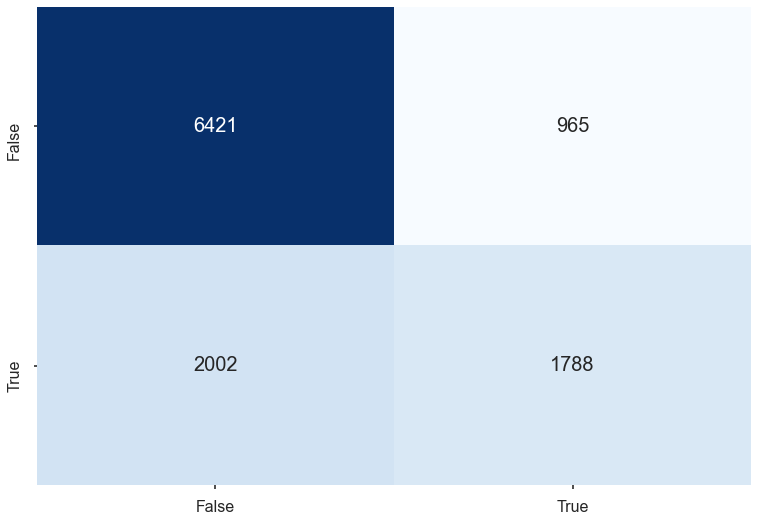

In [10]:
with open('results/xgboost_optimal_0.5', 'rb') as f:
    xgboost = pickle.load(f)

with open('results/preprocessed_data_0.5', 'rb') as f:
    data = pickle.load(f)


y_pred_xg = xgboost.best_estimator_.predict(data['x_test'])

plot_confusion(y_pred_xg, data['y_test'])

In [12]:
Precision = 1788/(1788+965)
Recall = 1788/(1788+6421)
print(f'The system precision is {Precision}; recall is {Recall}')

The system precision is 0.6494733018525245; recall is 0.21780972103788523


# Conclusion

* XGBoost performs the best of the 5 models, achieving 70% of accuracy.
* With train:test = 1:0.5, xgboost can achieve larger accuracy of 73%, but the recall rate is relatively low, which means, it is more likely to ignore true fraud than previous model trained by 1:1 train:test. 
* If given more time, I will explore multivariate Gaussian models for fraud detection.
* I would choose the 70% accuracy xgboost model since its recall is higher than the 73% one. 
* Due to limited datasize for fraudulent recordings, all models doesn't give high enough accuracy. 
* The test scores and validation scores are both very similar, so it does not seem like there is any under-fitting or over-fitting.
* I think further expand the fraudulent transaction dataset is helpful for further model optimization. 

NOTE: that the first version of `preprocessed_data` was overwritten by mistake. Now the accuracy numbers shown here may be slightly different (lower in most cases) due to loading of different dataset. But the original testing accuracies were recorded by markdowns. 